### Uniform Distribution
Lets start with generating some fake random data. You can get a random number between 0 and 1 using the python random module as follow:

In [1]:
import random
x=random.random()
print("The Value of x is", x)

The Value of x is 0.5589013599763983


Everytime you call random, you will get a new number.

*Exercise 1:* Using random, write a function `generate_uniform(N, mymin, mymax)`, that returns a python list containing N random numbers between specified minimum and maximum value. Note that you may want to quickly work out on paper how to turn numbers between 0 and 1 to between other values.

In [ ]:
# Skeleton
def generate_uniform(N,x_min,x_max):
    out = []

    for i in range(N):
      out.append(x_min + random.random() * (x_max - x_min))



    return out



In [ ]:

data=generate_uniform(1000,-10,10)
print ("Data Type:", type(data))
print ("Data Length:", len(data))
if len(data)>0:
    print ("Type of Data Contents:", type(data[0]))
    print ("Data Minimum:", min(data))
    print ("Data Maximum:", max(data))

Data Type: <class 'list'>
Data Length: 1000
Type of Data Contents: <class 'float'>
Data Minimum: -9.974860537225894
Data Maximum: 9.988463713627645


*Exercise 2a:*
Write a function that computes the mean of values in a list. Recall the equation for the mean of a random variable $\bf{x}$ computed on a data set of $n$ values $\{ x_i \} = \{x_1, x_2, ..., x_n\}$  is ${\bf\bar{x}} = \frac{1}{n} \sum_i^n x_i$.

In [4]:
# Skeleton
def mean(Data):
    m=0.

    if len(Data) >0:
      m = sum(Data)/len(Data)

    return m

In [5]:
# Test your solution here
print ("Mean of Data:", mean(data))

Mean of Data: 0.02996270670574305


*Exercise 2b:*
Write a function that computes the variance of values in a list. Recall the equation for the variance of a random variable $\bf{x}$ computed on a data set of $n$ values $\{ x_i \} = \{x_1, x_2, ..., x_n\}$  is ${\bf\langle x \rangle} = \frac{1}{n-1} \sum_i^n (x_i - {\bf\bar{x}})^2$.

In [6]:
# Skeleton
def variance(Data):
    m=0.

    n = len(Data)
    mean = sum(Data) / n
    m = sum((x - mean) ** 2 for x in Data) / (n - 1)
    return m

In [ ]:

print ("Variance of Data:", variance(data))

Variance of Data: 32.99416719954193


## Histogramming

*Exercise 3:* Write a function that bins the data so that you can create a histogram. An example of how to implement histogramming is the following logic:

* User inputs a list of values `x` and optionally `n_bins` which defaults to 10.
* If not supplied, find the minimum and maximum (`x_min`,`x_max`) of the values in x.
* Determine the bin size (`bin_size`) by dividing the range of the function by the number of bins.
* Create an empty list of zeros of size `n_bins`, call it `hist`.
* Loop over the values in `x`
    * Loop over the values in `hist` with index `i`:
        * If x is between `x_min+i*bin_size` and `x_min+(i+1)*bin_size`, increment `hist[i].`
        * For efficiency, try to use continue to goto the next bin and data point.
* Return `hist` and the list corresponding of the bin edges (i.e. of `x_min+i*bin_size`).    

In [ ]:

def histogram(x,n_bins=10,x_min=None,x_max=None):

    x_max = max(x) if x_max is None else x_max
    x_min = min(x) if x_min is None else x_min

    bin_size = (x_max - x_min) / n_bins
    hist = [0] * n_bins
    bin_edges = [x_min + i * bin_size for i in range(n_bins + 1)]

    for value in x:
        for i in range(n_bins):
            if x_min + i * bin_size <= value < x_min + (i + 1) * bin_size:
                hist[i] += 1
                break
        else:
   
            if value == x_max:
                hist[-1] += 1



    return hist,bin_edges

In [ ]:

h,b=histogram(data,100)
print(h)

[9, 8, 1, 13, 8, 13, 12, 8, 13, 9, 12, 4, 12, 9, 9, 10, 14, 10, 14, 9, 6, 4, 16, 14, 10, 11, 13, 11, 11, 8, 8, 11, 11, 8, 10, 12, 10, 10, 9, 12, 7, 14, 8, 10, 7, 18, 14, 9, 12, 5, 12, 17, 7, 13, 8, 5, 9, 6, 10, 10, 6, 7, 9, 14, 12, 9, 9, 11, 10, 11, 9, 8, 12, 11, 5, 6, 12, 11, 12, 10, 12, 12, 6, 15, 7, 15, 6, 7, 13, 8, 7, 5, 12, 7, 8, 17, 17, 11, 9, 9]


*Exercise 4:* Write a function that uses the histogram function in the previous exercise to create a text-based "graph". For example the output could look like the following:
```
[  0,  1] : ######
[  1,  2] : #####
[  2,  3] : ######
[  3,  4] : ####
[  4,  5] : ####
[  5,  6] : ######
[  6,  7] : #####
[  7,  8] : ######
[  8,  9] : ####
[  9, 10] : #####
```

Where each line corresponds to a bin and the number of `#`'s are proportional to the value of the data in the bin.

In [ ]:

def draw_histogram(x,n_bins,x_min=None,x_max=None,character="#",max_character_per_line=20):
   

    hist, bin_edges = histogram(x, n_bins, x_min, x_max)


    max_count = max(hist) if hist else 1  # Avoid division by zero

    for i in range(n_bins):

        num_characters = int((hist[i] / max_count) * max_character_per_line)


        print(f"[{bin_edges[i]:3.0f}, {bin_edges[i+1]:3.0f}] : {character * num_characters}")

  
    return hist,bin_edges

In [11]:
# Test your solution here
h,b= draw_histogram(data,20)


[-10,  -9] : ############
[ -9,  -8] : #################
[ -8,  -7] : ##############
[ -7,  -6] : ##################
[ -6,  -5] : ###############
[ -5,  -4] : #################
[ -4,  -3] : ###############
[ -3,  -2] : ################
[ -2,  -1] : ##############
[ -1,   0] : ##################
[  0,   1] : ##################
[  1,   2] : ############
[  2,   3] : ###############
[  3,   4] : ###############
[  4,   5] : ##############
[  5,   6] : ################
[  6,   7] : ################
[  7,   8] : ###############
[  8,   9] : ############
[  9,  10] : ####################


## Functional Programming

*Exercise 5:* Write a function the applies a booling function (that returns true/false) to every element in data, and return a list of indices of elements where the result was true. Use this function to find the indices of entries greater than 0.5.

In [12]:
def where(mylist,myfunc):
    out= []

    ### BEGIN SOLUTION

    for i, value in enumerate(mylist):
        if myfunc(value):
            out.append(i)

    ### END SOLUTION

    return out

In [13]:
# Test your solution here
data = [-0.1, 0.6, 0.3, 0.9, 0.15, 0.67]

# Find indices where value > 0.5
indices = where(data, lambda x: x > 0.5)

print("the correct indices are:", indices)


the correct indices are: [1, 3, 5]


*Exercise 6:* The `inrange(mymin,mymax)` function below returns a function that tests if it's input is between the specified values. Write corresponding functions that test:
* Even
* Odd
* Greater than
* Less than
* Equal
* Divisible by

In [14]:
def in_range(mymin,mymax):
    def testrange(x):
        return x<mymax and x>=mymin
    return testrange

# Examples:
F1=in_range(0,10)
F2=in_range(10,20)

# Test of in_range
print (F1(0), F1(1), F1(10), F1(15), F1(20))
print (F2(0), F2(1), F2(10), F2(15), F2(20))

print ("Number of Entries passing F1:", len(where(data,F1)))
print ("Number of Entries passing F2:", len(where(data,F2)))

True True False False False
False False True True False
Number of Entries passing F1: 5
Number of Entries passing F2: 0


In [15]:
def is_even():
    def check(x):
        return x % 2 == 0
    return check

def is_odd():
    def check(x):
        return x % 2 != 0
    return check

def greater_than(threshold):
    def check(x):
        return x > threshold
    return check

def less_than(threshold):
    def check(x):
        return x < threshold
    return check

def equal_to(value):
    def check(x):
        return x == value
    return check

def divisible_by(factor):
    def check(x):
        return x % factor == 0
    return check


In [16]:
# Test your
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

F_even = is_even()
F_gt5 = greater_than(5)

print("Even numbers total:", len(where(data, F_even)))
print("Number of numbers greater than 5 :", len(where(data, F_gt5)))


Even numbers total: 6
Number of numbers greater than 5 : 5


*Exercise 7:* Repeat the previous exercise using `lambda` and the built-in python functions sum and map instead of your solution above.

In [17]:
def is_even():
    return lambda x: x % 2 == 0

def is_odd():
    return lambda x: x % 2 != 0

def greater_than(threshold):
    return lambda x: x > threshold

def less_than(threshold):
    return lambda x: x < threshold

def equal_to(value):
    return lambda x: x == value

def divisible_by(factor):
    return lambda x: x % factor == 0

data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


print("Even count:", sum(map(is_even(), data)))
print("Greater than 5 count:", sum(map(greater_than(5), data)))


Even count: 6
Greater than 5 count: 5


## Monte Carlo

*Exercise 7:* Write a "generator" function called `generate_function(func,x_min,x_max,N)`, that instead of generating a flat distribution, generates a distribution with functional form coded in `func`. Note that `func` will always be > 0.  

Use the test function below and your histogramming functions above to demonstrate that your generator is working properly.

Hint: A simple, but slow, solution is to a draw random number `test_x` within the specified range and another number `p` between the `min` and `max` of the function (which you will have to determine). If `p<=function(test_x)`, then place `test_x` on the output. If not, repeat the process, drawing two new numbers. Repeat until you have the specified number of generated numbers, `N`. For this problem, it's OK to determine the `min` and `max` by numerically sampling the function.  

In [18]:
def generate_function(func,x_min,x_max,N=1000):
    out = list()

    num_samples = 1000
    sampled_values = [func(random.uniform(x_min, x_max)) for _ in range(num_samples)]
    f_max = max(sampled_values)

    # Step 2: Generate N samples
    while len(out) < N:

        test_x = random.uniform(x_min, x_max)


        p = random.uniform(0, f_max)

        if p <= func(test_x):
            out.append(test_x)

    return out

In [19]:
# A test function
def test_func(x,a=1,b=1):
    return abs(a*x+b)

*Exercise 8:* Use your function to generate 1000 numbers that are normal distributed, using the `gaussian` function below. Confirm the mean and variance of the data is close to the mean and variance you specify when building the Gaussian. Histogram the data.

In [20]:
import math

def gaussian(mean, sigma):
    def f(x):
        return math.exp(-((x-mean)**2)/(2*sigma**2))/math.sqrt(math.pi*sigma)
    return f

# Example Instantiation
g1=gaussian(0,1)
g2=gaussian(10,3)

Generated data mean: 0.047009052559372516
Generated data variance: 0.9396389963213062


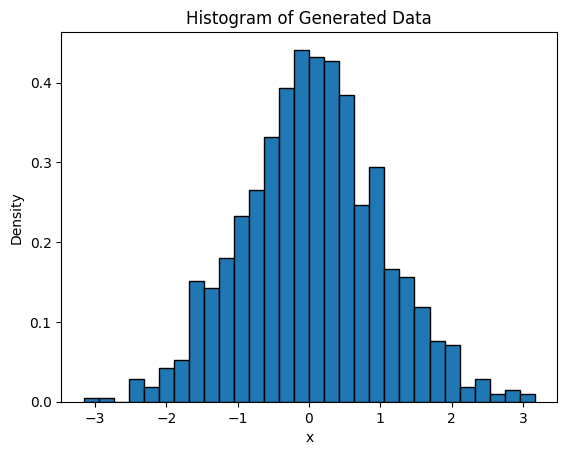

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

generated_data = generate_function(g1, -5, 5, N=1000)

mean_generated = np.mean(generated_data)
variance_generated = np.var(generated_data)

# The mean and variance
print("Generated data mean:", mean_generated)
print("Generated data variance:", variance_generated)

# The histogram of the generated data
plt.hist(generated_data, bins=30, edgecolor='black', density=True)
plt.title('Histogram of Generated Data')
plt.xlabel('x')
plt.ylabel('Density')


plt.show()

mean of g2 generated data: 10.090029764659743
variance of g2 generated data: 9.106112909783745


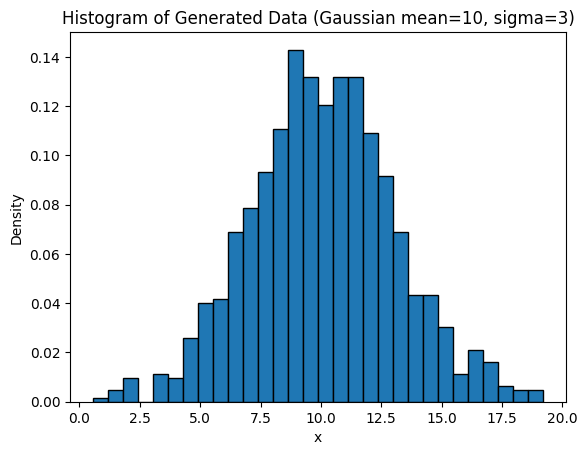

In [ ]:
generated_data_g2 = generate_function(g2, -20, 40, N=1000)


mean_generated_g2 = np.mean(generated_data_g2)
variance_generated_g2 = np.var(generated_data_g2)

print("mean of g2 generated data:", mean_generated_g2)
print("variance of g2 generated data:", variance_generated_g2)


plt.hist(generated_data_g2, bins=30, edgecolor='black', density=True)
plt.title('Histogram of Generated Data (Gaussian mean=10, sigma=3)')
plt.xlabel('x')
plt.ylabel('Density')


plt.show()


*Exercise 9:* Combine your `generate_function`, `where`, and `in_range` functions above to create an integrate function. Use your integrate function to show that approximately 68% of Normal distribution is within one variance.

In [ ]:
def integrate(func, mean, sigma, x_min, x_max, n_points=10000):
    generated_data = generate_function(func, x_min, x_max, n_points)

    test_range = in_range(mean - sigma, mean + sigma)
    indices_in_range = where(generated_data, test_range)

    proportion_in_range = len(indices_in_range) / n_points
    return proportion_in_range

g1 = gaussian(0, 2)
proportion = integrate(g1, mean=0, sigma=2, x_min=-10, x_max=10, n_points=10000)
print(f"Proportion of data within 1σ ≈ {proportion:.4f}")


Proportion of data within 1 standard deviation (approx): 68.32%
